# Decision Tree and Random Forest 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv", sep=",")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### Select the target

In [3]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Select input features

In [5]:
y = df['Survived']

In [6]:
X = df[['Age', 'Fare']]

#### Train-test-split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
X_train.shape, X_test.shape

((668, 2), (223, 2))

### Train a Baseline Model

In [9]:
from sklearn.tree import DecisionTreeClassifier

#### Train a Decision Tree with maximum depth 4 & fit

In [10]:
m = DecisionTreeClassifier(max_depth= 4)
m.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

#### Calculate training and test accuracy

In [11]:
print('train acc', round(m.score(X_train, y_train), 3))
print('test acc ', round(m.score(X_test, y_test), 3))

train acc 0.716
test acc  0.641


# RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report 

In [13]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=2)    #Hyperparam: n_estimators(number of trees)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [14]:
round(rfc.score(X_train, y_train),3)

0.702

In [15]:
round(rfc.score(X_test, y_test),3)

0.664

In [16]:
y_pred = rfc.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       134
           1       0.69      0.28      0.40        89

    accuracy                           0.66       223
   macro avg       0.68      0.60      0.58       223
weighted avg       0.67      0.66      0.62       223



In [27]:
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier()
cv = cross_validate(model, X_train, y_train,
                    cv=5,
                    scoring='accuracy',
                    return_train_score=True
)

cv = pd.DataFrame(cv)
print(cv)

   fit_time  score_time  test_score  train_score
0  0.007803    0.006907    0.738806     0.956929
1  0.003349    0.002756    0.679104     0.962547
2  0.008667    0.003835    0.611940     0.962547
3  0.006794    0.006218    0.699248     0.962617
4  0.003410    0.002008    0.661654     0.960748


### Feature Importance

In [18]:
importance = rfc.feature_importances_

In [19]:
for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.38356
Feature: 1, Score: 0.61644


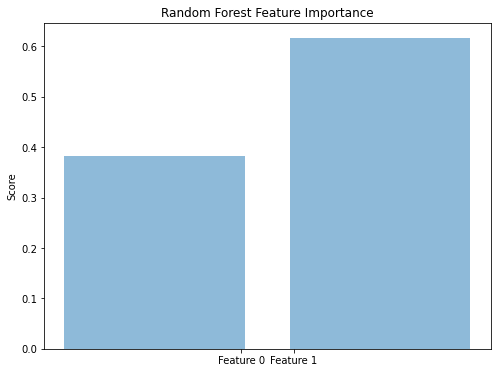

In [20]:
fig = plt.figure(figsize=(8,6))

plt.bar([x for x in range(len(importance))], importance, alpha=0.5 )
plt.title('Random Forest Feature Importance')


plt.xticks(importance, ('Feature 0', 'Feature 1'))               
                                                                  
plt.ylabel('Score')
plt.show()

In [21]:
print(confusion_matrix( y_test, y_pred))

[[123  11]
 [ 64  25]]


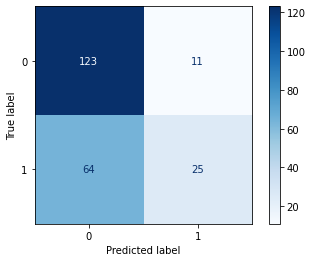

In [22]:
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)

In [23]:
from mlxtend.plotting import plot_decision_regions

In [24]:
Xa=X.to_numpy()
Xa
ya=y.to_numpy()

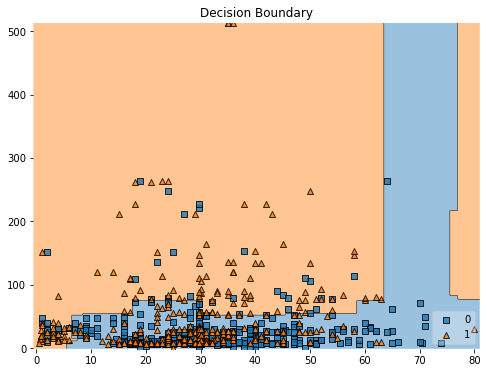

In [25]:
fig = plt.figure(figsize=(8,6))

for clf in zip([rfc]):                
    rfc.fit(Xa, ya)
    fig = plot_decision_regions(X=Xa, y=ya, clf=rfc, legend=4)
plt.title('Decision Boundary')
plt.show()

In [26]:
from sklearn.model_selection import cross_validate

model = RandomForestClassifier()
cv = cross_validate(model, X_train, y_train,
                    cv=5,
                    scoring='accuracy',
                    return_train_score=True
)

cv = pd.DataFrame(cv)
print(cv)

   fit_time  score_time  test_score  train_score
0  0.862217    0.059957    0.716418     0.956929
1  0.373943    0.022223    0.626866     0.962547
2  0.268105    0.016641    0.679104     0.962547
3  0.197253    0.014638    0.676692     0.962617
4  0.204955    0.016018    0.676692     0.960748
